<img src="https://github.com/FarzadNekouee/Flight-EDA-to-Preprocessing/blob/master/image.jpg?raw=true" width="1800">


In [33]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [34]:
# Read dataset
df = pd.read_csv('/content/flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [35]:
# Display a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16685 entries, 0 to 16684
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              16685 non-null  int64  
 1   year            16685 non-null  int64  
 2   month           16685 non-null  int64  
 3   day             16685 non-null  int64  
 4   dep_time        16524 non-null  float64
 5   sched_dep_time  16685 non-null  int64  
 6   dep_delay       16524 non-null  float64
 7   arr_time        16515 non-null  float64
 8   sched_arr_time  16685 non-null  int64  
 9   arr_delay       16471 non-null  float64
 10  carrier         16685 non-null  object 
 11  flight          16685 non-null  int64  
 12  tailnum         16627 non-null  object 
 13  origin          16685 non-null  object 
 14  dest            16685 non-null  object 
 15  air_time        16471 non-null  float64
 16  distance        16685 non-null  int64  
 17  hour            16685 non-null 

In [36]:
# Convert 'id' and 'flight' to object data type
df['id'] = df['id'].astype(str)
df['flight'] = df['flight'].astype(str)

In [37]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,16685.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,16685.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
day,16685.0,10.027690,5.507690,1.0,5.0,10.0,15.0,20.0
dep_time,16524.0,1338.795146,477.957496,1.0,900.0,1357.0,1732.0,2359.0
sched_dep_time,16685.0,1335.321127,467.505152,500.0,900.0,1355.0,1725.0,2359.0
dep_delay,16524.0,7.346950,33.289894,-30.0,-5.0,-2.0,5.0,1301.0
arr_time,16515.0,1521.577051,509.067919,1.0,1115.0,1553.0,1942.0,2400.0
sched_arr_time,16685.0,1539.216422,490.359588,2.0,1125.0,1602.0,1945.0,2359.0
arr_delay,16471.0,2.866493,37.131012,-70.0,-15.0,-4.0,10.0,1272.0
air_time,16471.0,154.354259,94.250093,20.0,85.0,138.0,194.0,667.0


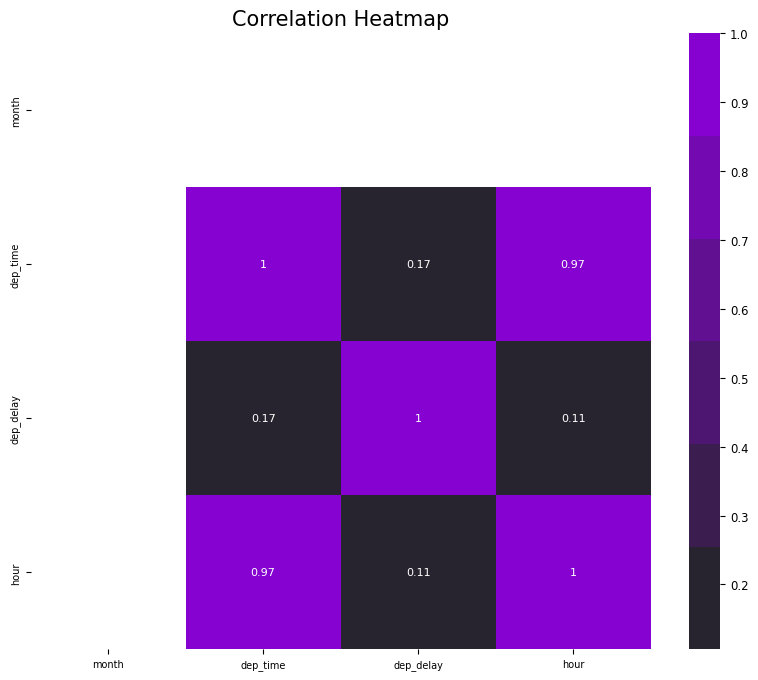

In [38]:
colors_multi = sns.dark_palette("#8502d1", as_cmap=False)

# For correlation heatmap, let's consider the numeric features only
numeric_features = ['month', 'dep_time', 'dep_delay', 'hour']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap=colors_multi, annot_kws={"size": 8})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

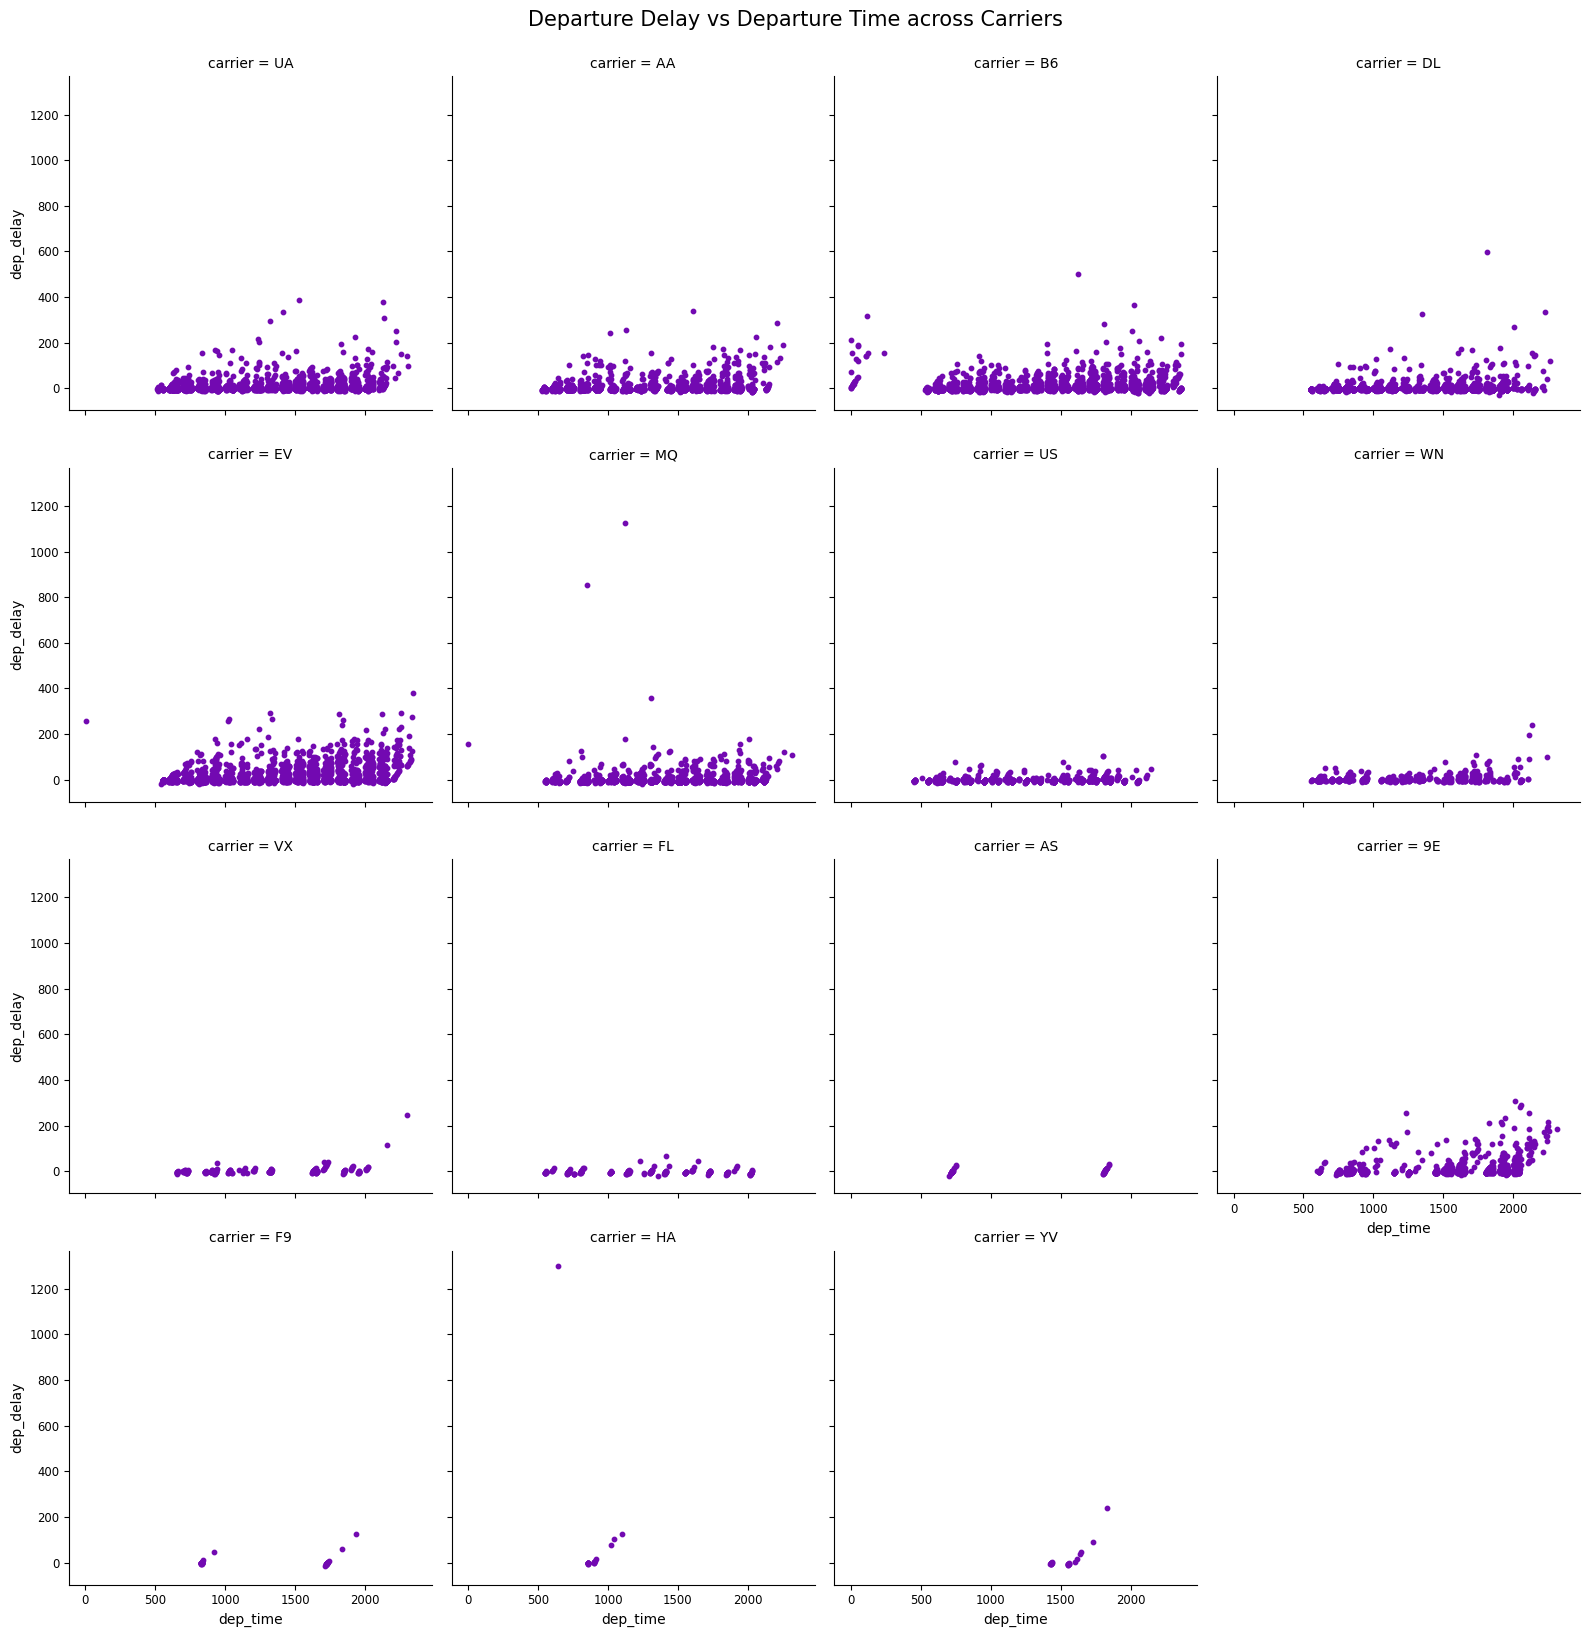

In [39]:
# 'dep_delay' vs 'dep_time' across different 'carrier'
g = sns.FacetGrid(df, col="carrier", col_wrap=4, height=4, aspect=1)
g.map(plt.scatter, "dep_time", "dep_delay", color=colors_multi[-2], s=10)
g.fig.suptitle('Departure Delay vs Departure Time across Carriers', fontsize=15, y=1.02)
plt.show()

In [40]:
df.drop(['id', 'year', 'flight', 'tailnum', 'time_hour', 'minute', 'hour', 'carrier'], axis=1, inplace=True)

In [41]:
df.columns

Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'origin', 'dest', 'air_time', 'distance',
       'name'],
      dtype='object')

In [42]:
# Check the percentage of missing values in each column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Columns:\n", round(missing_percent,2))

Missing Value Percentage by Columns:
 arr_delay         1.28
air_time          1.28
arr_time          1.02
dep_time          0.96
dep_delay         0.96
month             0.00
day               0.00
sched_dep_time    0.00
sched_arr_time    0.00
origin            0.00
dest              0.00
distance          0.00
name              0.00
dtype: float64


In [43]:
df.dropna(subset=['arr_delay'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [44]:
# Separate features and target
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
columns_to_impute = ['dep_time', 'dep_delay', 'arr_time', 'air_time']
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Check missing values again
X.isnull().sum().sum()

0

In [45]:
# Create a copy of the dataset for encoding
X_encoded = X.copy()

# Apply one-hot encoding to 'carrier', 'origin', and 'name'
X_encoded = pd.get_dummies(X_encoded, columns=['origin', 'name'], drop_first=True)

# Apply frequency encoding to 'dest'
dest_freq = X_encoded['dest'].value_counts() / len(X_encoded)  # calculate the frequencies
X_encoded['dest'] = X_encoded['dest'].map(dest_freq)  # map frequencies to the feature

# Show the result
X_encoded.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,dest,air_time,distance,...,name_ExpressJet Airlines Inc.,name_Frontier Airlines Inc.,name_Hawaiian Airlines Inc.,name_JetBl,name_JetBlue Airways,name_Mesa Airlines Inc.,name_Southwest Airlines Co.,name_US Airways Inc.,name_United Air Lines Inc.,name_Virgin America
0,1,1,517.0,515,2.0,830.0,819,0.021128,227.0,1400,...,False,False,False,False,False,False,False,False,True,False
1,1,1,533.0,529,4.0,850.0,830,0.021128,227.0,1416,...,False,False,False,False,False,False,False,False,True,False
2,1,1,542.0,540,2.0,923.0,850,0.037035,160.0,1089,...,False,False,False,False,False,False,False,False,False,False
3,1,1,544.0,545,-1.0,1004.0,1022,0.003521,183.0,1576,...,False,False,False,False,True,False,False,False,False,False
4,1,1,554.0,600,-6.0,812.0,837,0.051788,116.0,762,...,False,False,False,False,False,False,False,False,False,False


In [46]:
# Time Feature Transformation
def transform_time(df, columns):
    for col in columns:
        df[col + '_sin'] = np.sin(2 * np.pi * df[col]/2400)
        df[col + '_cos'] = np.cos(2 * np.pi * df[col]/2400)
        df.drop(columns=col, inplace=True)
    return df

# List of 'hhmm' formatted features
time_cols = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']

# Apply transformation
X_encoded = transform_time(X_encoded, time_cols)

X_encoded.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,1,1,2.0,0.021128,227.0,1400,False,False,False,False,...,True,False,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,1,1,4.0,0.021128,227.0,1416,False,True,False,False,...,True,False,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,1,1,2.0,0.037035,160.0,1089,True,False,False,True,...,False,False,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,1,1,-1.0,0.003521,183.0,1576,True,False,False,False,...,False,False,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,1,1,-6.0,0.051788,116.0,762,False,True,False,False,...,False,False,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


In [47]:
# Define binary, cyclic, and continuous columns
binary_cols     = [col for col in X_encoded.columns if X_encoded[col].value_counts().index.isin([0,1]).all()]
cyclic_cols     = [col for col in X_encoded.columns if col.endswith('_cos') or col.endswith('_sin')]
continuous_cols = [col for col in X_encoded.columns if col not in binary_cols + cyclic_cols]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the continuous features
X_encoded[continuous_cols] = scaler.fit_transform(X_encoded[continuous_cols])

# Show the result
X_encoded.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,1,-1.637214,-0.159479,-0.327805,0.770800,0.531186,False,False,False,False,...,True,False,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,1,-1.637214,-0.099317,-0.327805,0.770800,0.553368,False,True,False,False,...,True,False,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,1,-1.637214,-0.159479,0.695002,0.059904,0.100025,True,False,False,True,...,False,False,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,1,-1.637214,-0.249721,-1.459921,0.303943,0.775188,True,False,False,False,...,False,False,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,1,-1.637214,-0.400125,1.643637,-0.406954,-0.353318,False,True,False,False,...,False,False,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


In [48]:
continuous_cols

['day', 'dep_delay', 'dest', 'air_time', 'distance']

In [49]:
# Define the function to plot histograms with specified color
def plot_hist(column, title, xlabel, color, bins=30):
    sns.histplot(column, bins=bins, color=color, edgecolor='white', kde=True)
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

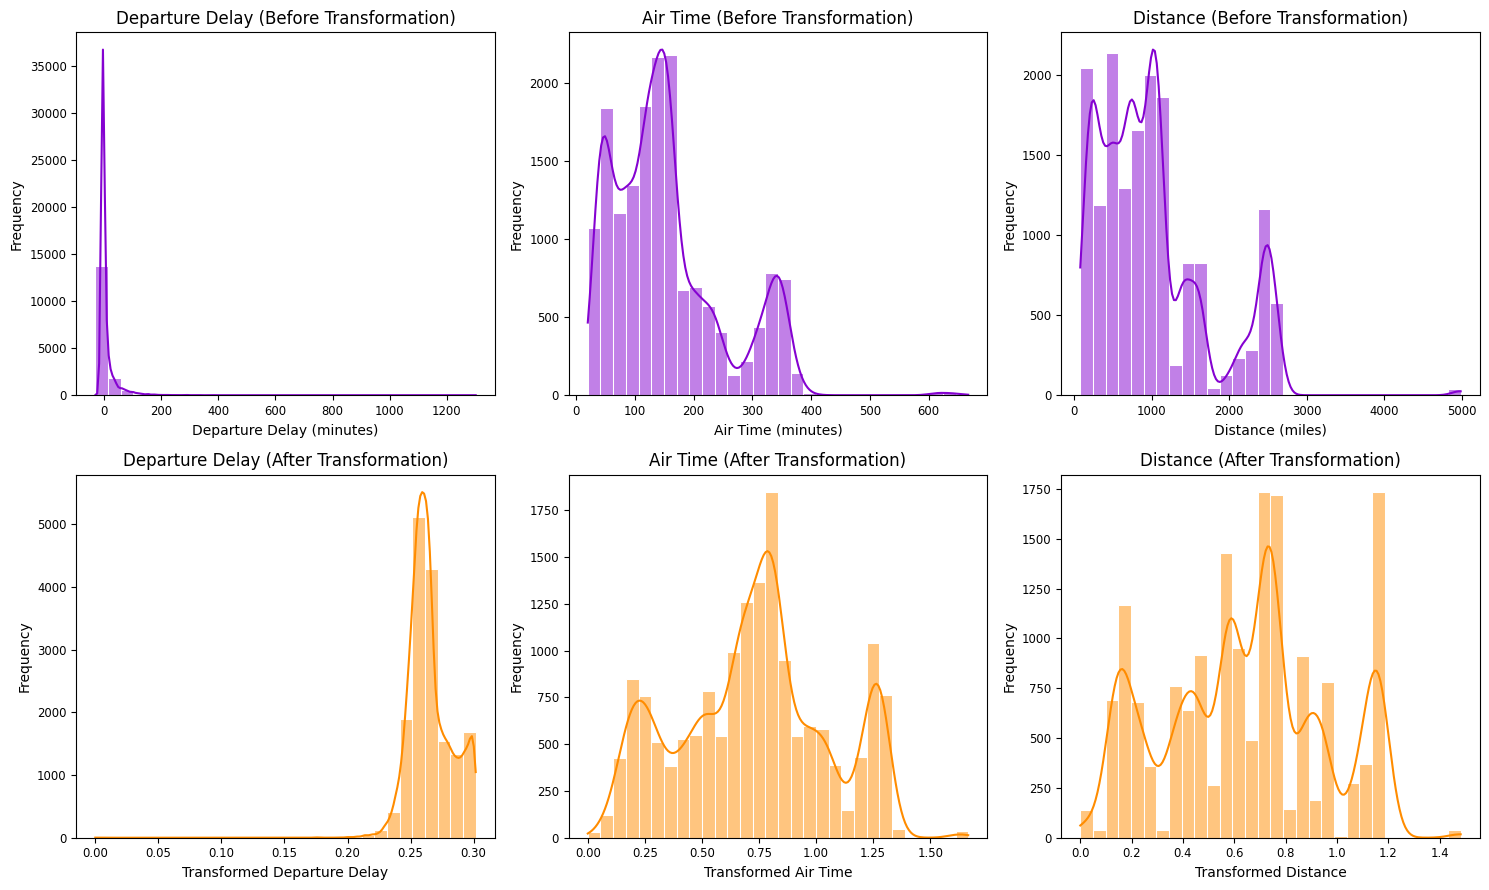

In [50]:
# Identify the features that might need a Box-Cox transformation
skewed_features = ['dep_delay', 'air_time', 'distance']

# Copy the dataset
X_transformed = X_encoded.copy()

# Apply Box-Cox transformation
for feature in skewed_features:
    # Adding a constant value to make all values positive
    X_transformed[feature] = X_transformed[feature] + abs(X_transformed[feature].min()) + 1
    X_transformed[feature], _ = stats.boxcox(X_transformed[feature])


# Plot histograms of 'dep_delay', 'air_time', and 'distance' before transformation
plt.figure(figsize=(15, 9))

plt.subplot(2, 3, 1)
plot_hist(df['dep_delay'], title='Departure Delay (Before Transformation)', xlabel='Departure Delay (minutes)', color='#8502d1')

plt.subplot(2, 3, 2)
plot_hist(df['air_time'], title='Air Time (Before Transformation)', xlabel='Air Time (minutes)', color='#8502d1')

plt.subplot(2, 3, 3)
plot_hist(df['distance'], title='Distance (Before Transformation)', xlabel='Distance (miles)', color='#8502d1')


# Plot histograms of 'dep_delay', 'air_time', and 'distance' after transformation
plt.subplot(2, 3, 4)
plot_hist(X_transformed['dep_delay'], title='Departure Delay (After Transformation)', xlabel='Transformed Departure Delay', color='darkorange')

plt.subplot(2, 3, 5)
plot_hist(X_transformed['air_time'], title='Air Time (After Transformation)', xlabel='Transformed Air Time', color='darkorange')

plt.subplot(2, 3, 6)
plot_hist(X_transformed['distance'], title='Distance (After Transformation)', xlabel='Transformed Distance', color='darkorange')

# Set global tick label size
plt.rcParams['xtick.labelsize'] = 'small'  # for x-axis
plt.rcParams['ytick.labelsize'] = 'small'  # for y-axis

plt.tight_layout()
plt.show()

In [51]:
X_transformed.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,1,-1.637214,0.269382,-0.327805,1.028465,0.877422,False,False,False,False,...,True,False,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,1,-1.637214,0.272456,-0.327805,1.028465,0.882913,False,True,False,False,...,True,False,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,1,-1.637214,0.269382,0.695002,0.827039,0.757727,True,False,False,True,...,False,False,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,1,-1.637214,0.263933,-1.459921,0.903309,0.934853,True,False,False,False,...,False,False,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,1,-1.637214,0.251866,1.643637,0.652031,0.596137,False,True,False,False,...,False,False,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


In [52]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16471 entries, 0 to 16470
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   month                          16471 non-null  int64  
 1   day                            16471 non-null  float64
 2   dep_delay                      16471 non-null  float64
 3   dest                           16471 non-null  float64
 4   air_time                       16471 non-null  float64
 5   distance                       16471 non-null  float64
 6   origin_JFK                     16471 non-null  bool   
 7   origin_LGA                     16471 non-null  bool   
 8   name_Alaska Airlines Inc.      16471 non-null  bool   
 9   name_American Airlines Inc.    16471 non-null  bool   
 10  name_Delta Air Lines Inc.      16471 non-null  bool   
 11  name_Endeavor Air Inc.         16471 non-null  bool   
 12  name_Envoy Air                 16471 non-null 

In [57]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (13176, 31)
Shape of X_test: (3295, 31)
Shape of y_train: (13176,)
Shape of y_test: (3295,)
